### Model to predict term deposit subscribers - Bank Marketing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

### Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 


In [88]:
d = pd.read_csv('bank-additional-full.csv', sep = ';')

In [89]:
d.shape

(41188, 21)

In [90]:
d.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [91]:
d.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [92]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [ ]:
#Renaming the columns

In [93]:
d.rename(columns = {'cons.price.idx': 'cons_price_idx', 'cons.conf.idx': 'cons_conf_idx', 'euribor3m': 'euribor_3_month', 'nr.employed': 'employees'}, inplace = True)

In [94]:
d.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor_3_month', 'employees', 'y'],
      dtype='object')

In [95]:
d.rename(columns = {'y': 'deposit'}, inplace = True)

#### Attribute Information:

Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') 
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [96]:
d.rename(columns = {'emp.var.rate': 'emp_var_rate'}, inplace = True)

In [97]:
d.columns


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor_3_month', 'employees', 'deposit'],
      dtype='object')

In [98]:
d.shape

(41188, 21)

In [99]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age                41188 non-null int64
job                41188 non-null object
marital            41188 non-null object
education          41188 non-null object
default            41188 non-null object
housing            41188 non-null object
loan               41188 non-null object
contact            41188 non-null object
month              41188 non-null object
day_of_week        41188 non-null object
duration           41188 non-null int64
campaign           41188 non-null int64
pdays              41188 non-null int64
previous           41188 non-null int64
poutcome           41188 non-null object
emp_var_rate       41188 non-null float64
cons_price_idx     41188 non-null float64
cons_conf_idx      41188 non-null float64
euribor_3_month    41188 non-null float64
employees          41188 non-null float64
deposit            41188 non-null object
dtypes: float64(5), int64(5), 

In [14]:
d.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp_var_rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons_price_idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons_conf_idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor_3_month,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
employees,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [15]:
d.employees.unique()

array([5191. , 5228.1, 5195.8, 5176.3, 5099.1, 5076.2, 5017.5, 5023.5,
       5008.7, 4991.6, 4963.6])

In [16]:
d.emp_var_rate.unique()

array([ 1.1,  1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3. , -1.7, -1.1])

In [17]:
d.cons_price_idx.unique()

array([93.994, 94.465, 93.918, 93.444, 93.798, 93.2  , 92.756, 92.843,
       93.075, 92.893, 92.963, 92.469, 92.201, 92.379, 92.431, 92.649,
       92.713, 93.369, 93.749, 93.876, 94.055, 94.215, 94.027, 94.199,
       94.601, 94.767])

In [18]:
d.euribor_3_month.unique()

array([4.857, 4.856, 4.855, 4.859, 4.86 , 4.858, 4.864, 4.865, 4.866,
       4.967, 4.961, 4.959, 4.958, 4.96 , 4.962, 4.955, 4.947, 4.956,
       4.966, 4.963, 4.957, 4.968, 4.97 , 4.965, 4.964, 5.045, 5.   ,
       4.936, 4.921, 4.918, 4.912, 4.827, 4.794, 4.76 , 4.733, 4.7  ,
       4.663, 4.592, 4.474, 4.406, 4.343, 4.286, 4.245, 4.223, 4.191,
       4.153, 4.12 , 4.076, 4.021, 3.901, 3.879, 3.853, 3.816, 3.743,
       3.669, 3.563, 3.488, 3.428, 3.329, 3.282, 3.053, 1.811, 1.799,
       1.778, 1.757, 1.726, 1.703, 1.687, 1.663, 1.65 , 1.64 , 1.629,
       1.614, 1.602, 1.584, 1.574, 1.56 , 1.556, 1.548, 1.538, 1.531,
       1.52 , 1.51 , 1.498, 1.483, 1.479, 1.466, 1.453, 1.445, 1.435,
       1.423, 1.415, 1.41 , 1.405, 1.406, 1.4  , 1.392, 1.384, 1.372,
       1.365, 1.354, 1.344, 1.334, 1.327, 1.313, 1.299, 1.291, 1.281,
       1.266, 1.25 , 1.244, 1.259, 1.264, 1.27 , 1.262, 1.26 , 1.268,
       1.286, 1.252, 1.235, 1.224, 1.215, 1.206, 1.099, 1.085, 1.072,
       1.059, 1.048,

In [19]:
# No null values
d.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
emp_var_rate       0
cons_price_idx     0
cons_conf_idx      0
euribor_3_month    0
employees          0
deposit            0
dtype: int64

In [20]:
d.dtypes

age                  int64
job                 object
marital             object
education           object
default             object
housing             object
loan                object
contact             object
month               object
day_of_week         object
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome            object
emp_var_rate       float64
cons_price_idx     float64
cons_conf_idx      float64
euribor_3_month    float64
employees          float64
deposit             object
dtype: object

In [21]:
d.corr()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3_month,employees
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp_var_rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons_price_idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons_conf_idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor_3_month,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
employees,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


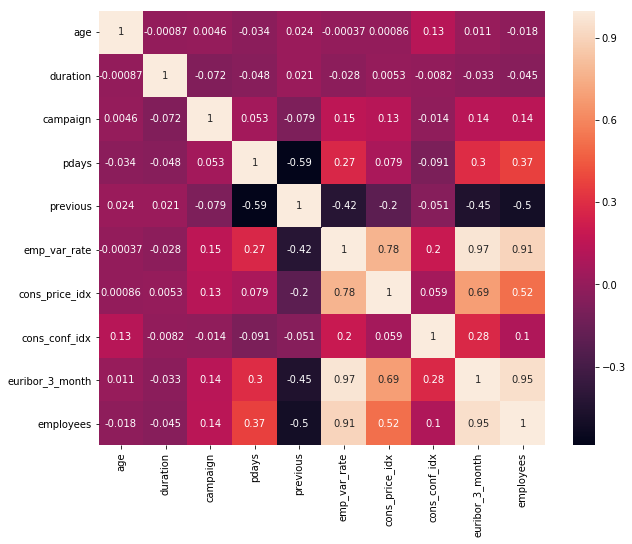

In [22]:
plt.figure(figsize = (10,8))
sns.heatmap(d.corr(), annot = True)

In [100]:
#There is high correlation between employees, employee rate, cons_price_idx with euribor3 so dropping those 3 features:
d.drop(columns = ['employees', 'emp_var_rate', 'cons_price_idx'], inplace = True, axis = 1)

In [101]:
d.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons_conf_idx', 'euribor_3_month', 'deposit'],
      dtype='object')

In [102]:
d.poutcome.unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [103]:
d.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [104]:
d.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [ ]:
## Cleaning the labels

In [105]:
def edu_clean(x):
    if (x == 'professional.course') | (x == 'university.degree'):
        x = 'tertiary'
    elif (x == 'basic.4y') | (x == 'basic.6y'):
        x = 'primary'
    elif (x == 'high.school') | (x == 'basic.9y'):
        x = 'secondary'
    else:
        return x
    return x

In [106]:
d.education = d.education.map(edu_clean)

In [107]:
d.education.unique()

array(['primary', 'secondary', 'tertiary', 'unknown', 'illiterate'],
      dtype=object)

In [108]:
d.education.value_counts()

tertiary      17411
secondary     15560
primary        6468
unknown        1731
illiterate       18
Name: education, dtype: int64

In [109]:
d.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons_conf_idx,euribor_3_month,deposit
0,56,housemaid,married,primary,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,-36.4,4.857,no
1,57,services,married,secondary,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,-36.4,4.857,no
2,37,services,married,secondary,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,-36.4,4.857,no
3,40,admin.,married,primary,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,-36.4,4.857,no
4,56,services,married,secondary,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,-36.4,4.857,no


In [ ]:
#Checking all features for unique values and dirty data

In [110]:
d.marital.unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [90]:
d.default.unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [73]:
d.housing.unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [74]:
d.loan.unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [75]:
d.contact.unique()

array(['telephone', 'cellular'], dtype=object)

In [76]:
d.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [77]:
d.day_of_week.unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [78]:
d.campaign.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43], dtype=int64)

In [33]:
d[(d.housing == 'unknown') & (d.deposit == 'yes')].count()

age                107
job                107
marital            107
education          107
default            107
housing            107
loan               107
contact            107
month              107
day_of_week        107
duration           107
campaign           107
pdays              107
previous           107
poutcome           107
cons_conf_idx      107
euribor_3_month    107
deposit            107
dtype: int64

In [34]:
d[(d.loan == 'unknown') & (d.deposit == 'yes')].count()

age                107
job                107
marital            107
education          107
default            107
housing            107
loan               107
contact            107
month              107
day_of_week        107
duration           107
campaign           107
pdays              107
previous           107
poutcome           107
cons_conf_idx      107
euribor_3_month    107
deposit            107
dtype: int64

In [35]:
d[(d.job == 'unknown') & (d.deposit == 'yes')].count()

age                37
job                37
marital            37
education          37
default            37
housing            37
loan               37
contact            37
month              37
day_of_week        37
duration           37
campaign           37
pdays              37
previous           37
poutcome           37
cons_conf_idx      37
euribor_3_month    37
deposit            37
dtype: int64

In [94]:
d[(d.marital == 'unknown') & (d.deposit == 'yes')].count()

age                12
job                12
marital            12
education          12
default            12
housing            12
loan               12
contact            12
month              12
day_of_week        12
duration           12
campaign           12
pdays              12
previous           12
poutcome           12
cons_conf_idx      12
euribor_3_month    12
deposit            12
dtype: int64

In [95]:
d[(d.education == 'unknown') & (d.deposit == 'yes')].count()

age                251
job                251
marital            251
education          251
default            251
housing            251
loan               251
contact            251
month              251
day_of_week        251
duration           251
campaign           251
pdays              251
previous           251
poutcome           251
cons_conf_idx      251
euribor_3_month    251
deposit            251
dtype: int64

In [96]:
d[(d.default == 'unknown') & (d.deposit == 'yes')].count()

age                443
job                443
marital            443
education          443
default            443
housing            443
loan               443
contact            443
month              443
day_of_week        443
duration           443
campaign           443
pdays              443
previous           443
poutcome           443
cons_conf_idx      443
euribor_3_month    443
deposit            443
dtype: int64

In [ ]:
#Some features have unknown values, not dropping them now as they have valuable information about the target.

#### Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000132FBC316D8>,
      dtype=object)

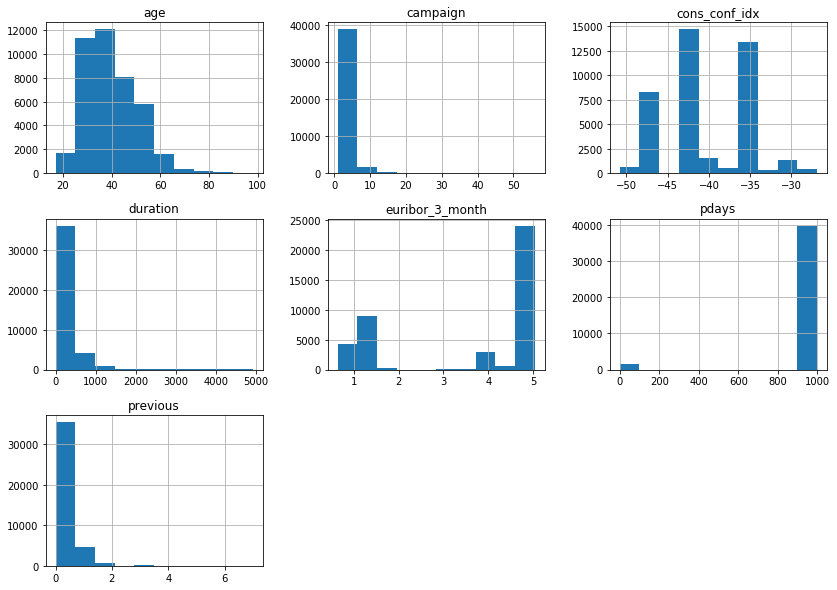

In [36]:
d.hist(figsize = (14,10))

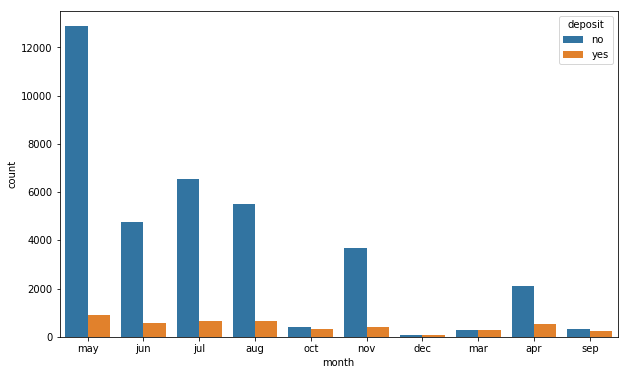

In [100]:
plt.figure(figsize = (10,6))
sns.countplot(d.month, hue = d.deposit)

In [101]:
d.campaign.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43], dtype=int64)

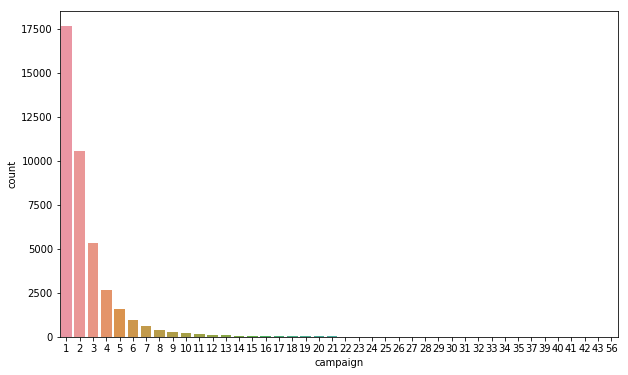

In [73]:
plt.figure(figsize = (10,6))
sns.countplot(d.campaign)

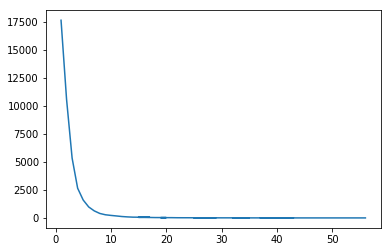

In [74]:
d.campaign.value_counts().plot()

In [38]:
## Customers were not contacted previously in any campaigns and were contacted only in the current campaign: lets slice that
## data in a separate dataframe
current_campaign_outcome = d[d.pdays == 999]

In [76]:
previous_campaign_outcome.shape

(1515, 18)

In [40]:
current_campaign_outcome.shape

(39673, 18)

In [54]:
current_campaign = current_campaign_outcome.deposit.value_counts()/len(current_campaign_outcome.deposit) * 100

In [73]:
current_campaign

no     90.741814
yes     9.258186
Name: deposit, dtype: float64

C:\Users\r_ani\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


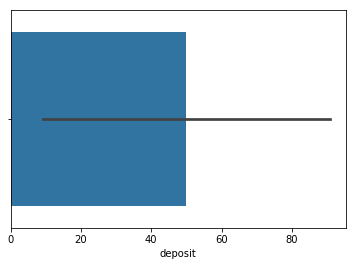

In [72]:
sns.barplot(current_campaign, hue = current_campaign[0])

In [111]:
len(current_campaign_outcome)/len(d) * 100

96.32174419733903

In [112]:
len(previous_campaign_outcome)/len(d) * 100

3.6782558026609693

In [39]:
previous_campaign_outcome = d[d.pdays != 999]

In [45]:
previous_campaign_outcome.shape

(1515, 18)

In [53]:
previous_campaign = previous_campaign_outcome.deposit.value_counts()/len(previous_campaign_outcome.deposit) * 100

In [75]:
previous_campaign

yes    63.828383
no     36.171617
Name: deposit, dtype: float64

####From above analysis, it clearly indicates that current campaign had only 9% conversion rate inspite of huge volume of marketing calls

#### Previous campaign done well, as the conversion rate was 63% out of 1515 calls.

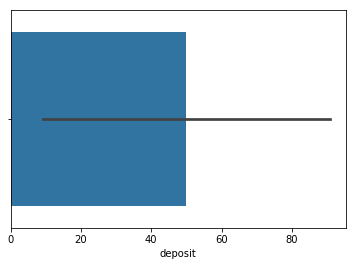

In [56]:
sns.barplot(current_campaign)

In [114]:
d[(d.pdays == 999) & (d.deposit == 'no')].count()

age                36000
job                36000
marital            36000
education          36000
default            36000
housing            36000
loan               36000
contact            36000
month              36000
day_of_week        36000
duration           36000
campaign           36000
pdays              36000
previous           36000
poutcome           36000
cons_conf_idx      36000
euribor_3_month    36000
deposit            36000
dtype: int64

In [145]:
d.campaign.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43], dtype=int64)

In [76]:
d[(d.pdays == 999)].count()

age                39673
job                39673
marital            39673
education          39673
default            39673
housing            39673
loan               39673
contact            39673
month              39673
day_of_week        39673
duration           39673
campaign           39673
pdays              39673
previous           39673
poutcome           39673
cons_conf_idx      39673
euribor_3_month    39673
deposit            39673
dtype: int64

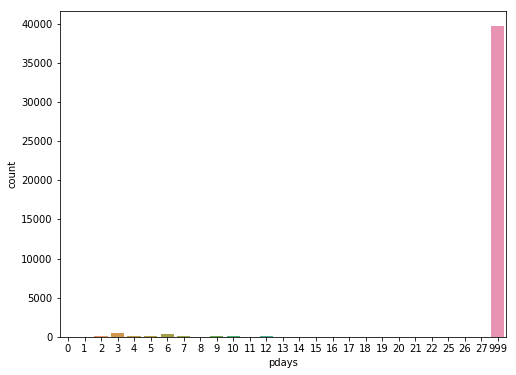

In [146]:
plt.figure(figsize = (8,6))
sns.countplot(d.pdays)

In [147]:
d.previous.unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

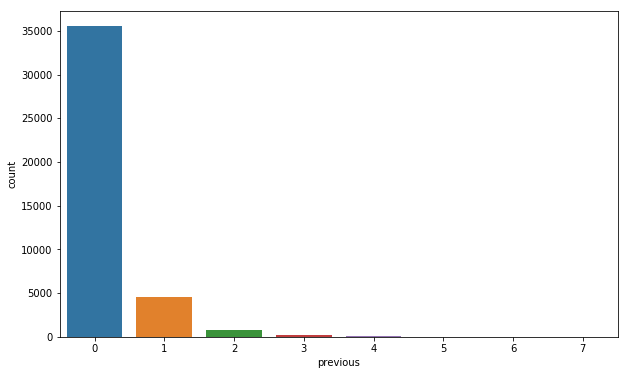

In [148]:
plt.figure(figsize = (10,6))
sns.countplot(d.previous)

In [80]:
d.poutcome.unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

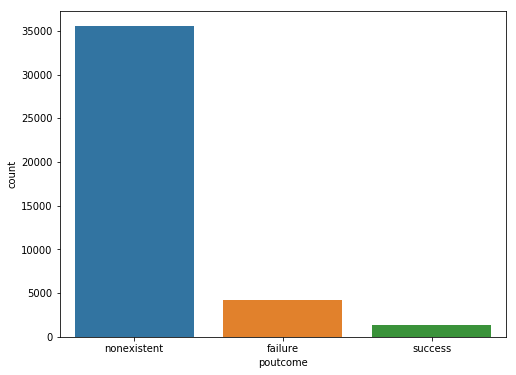

In [149]:
plt.figure(figsize = (8,6))
sns.countplot(d.poutcome)

In [82]:
d.cons_conf_idx.unique()

array([-36.4, -41.8, -42.7, -36.1, -40.4, -42. , -45.9, -50. , -47.1,
       -46.2, -40.8, -33.6, -31.4, -29.8, -26.9, -30.1, -33. , -34.8,
       -34.6, -40. , -39.8, -40.3, -38.3, -37.5, -49.5, -50.8])

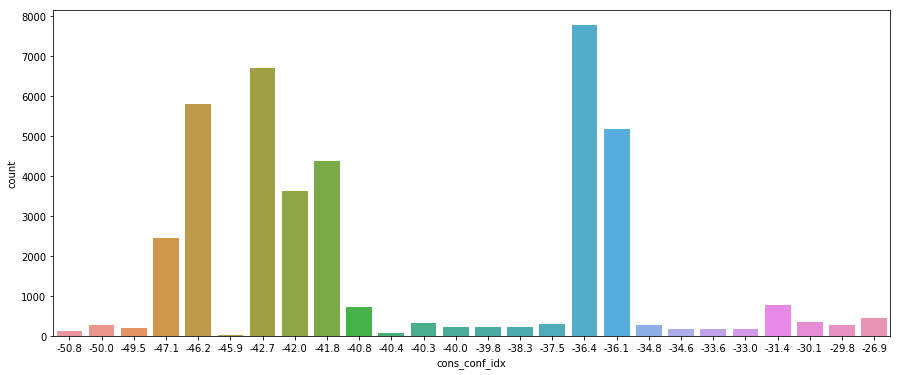

In [150]:
plt.figure(figsize = (15,6))
sns.countplot(d.cons_conf_idx)

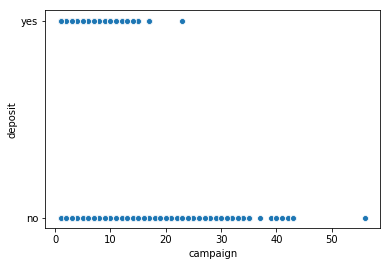

In [84]:
sns.scatterplot(d.campaign, d.deposit)

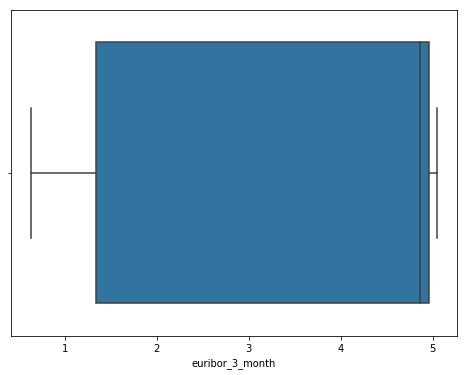

In [151]:
plt.figure(figsize = (8,6))
sns.boxplot(d.euribor_3_month)

In [86]:
d.deposit.unique()

array(['no', 'yes'], dtype=object)

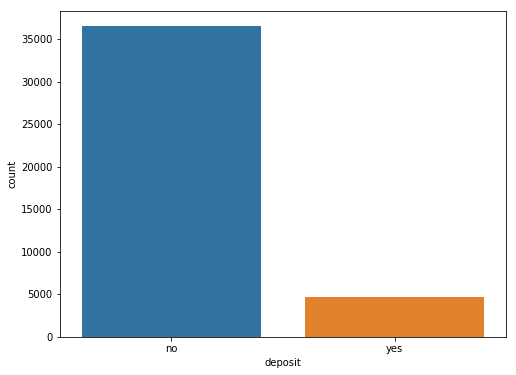

In [87]:
plt.figure(figsize = (8,6))
sns.countplot(d.deposit)

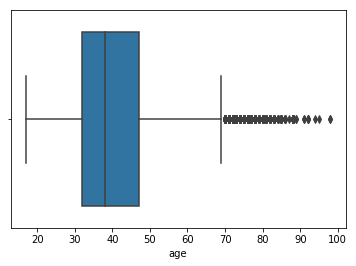

In [88]:
sns.boxplot(d.age)

In [89]:
d.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
cons_conf_idx      0
euribor_3_month    0
deposit            0
dtype: int64

C:\Users\r_ani\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


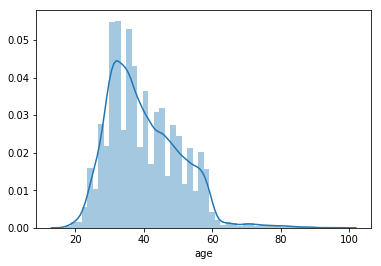

In [77]:
sns.distplot(d.age)

In [ ]:
p = np.ceil(d.marital.value_counts() * 100 /len(d.marital))

In [97]:
p

,marital
married,61.0
single,29.0
divorced,12.0
unknown,1.0


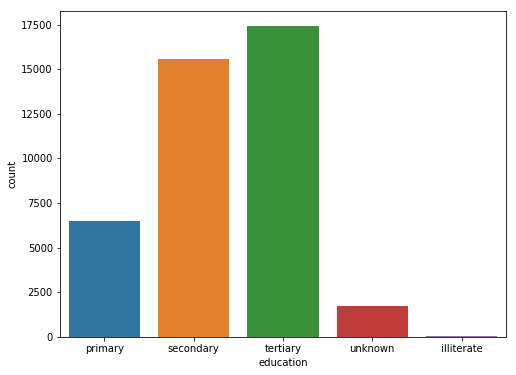

In [78]:
plt.figure(figsize = (8,6))
sns.countplot(d.education)

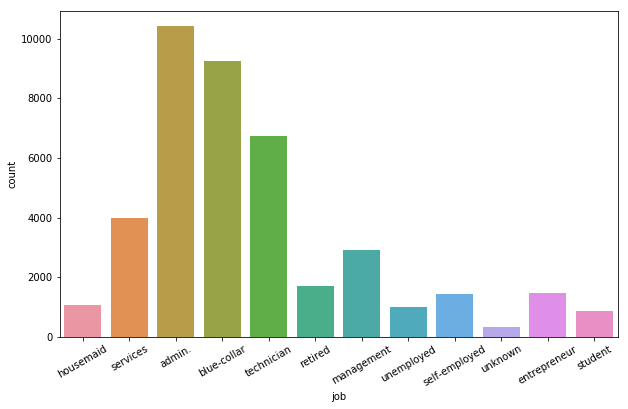

In [100]:
plt.figure(figsize = (10,6))
g = sns.countplot(d.job)
tick_labels = g.set_xticklabels(g.get_xticklabels(),rotation=30)

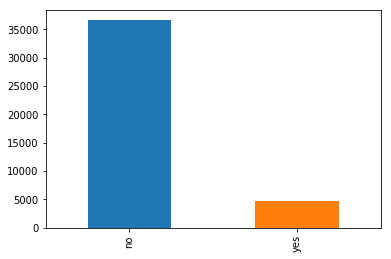

In [101]:
d['deposit'].value_counts().plot(kind = 'bar')

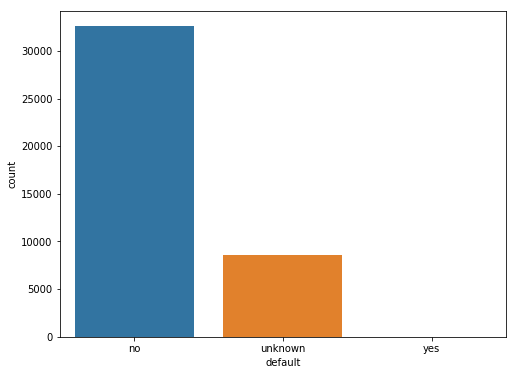

In [102]:
plt.figure(figsize = (8,6))
sns.countplot(d.default)

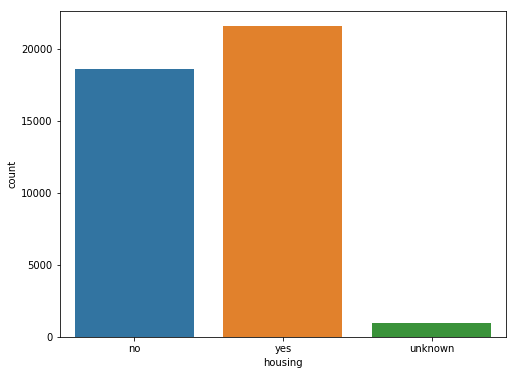

In [103]:
plt.figure(figsize = (8,6))
sns.countplot(d.housing)

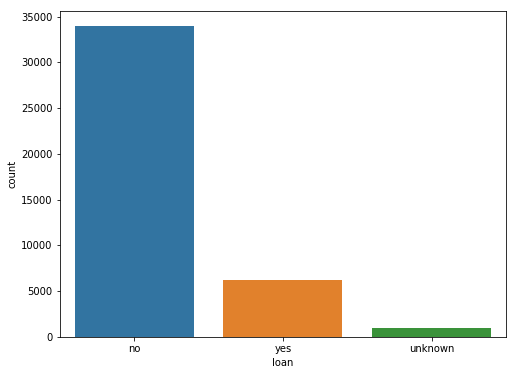

In [104]:
plt.figure(figsize = (8,6))
sns.countplot(d.loan)

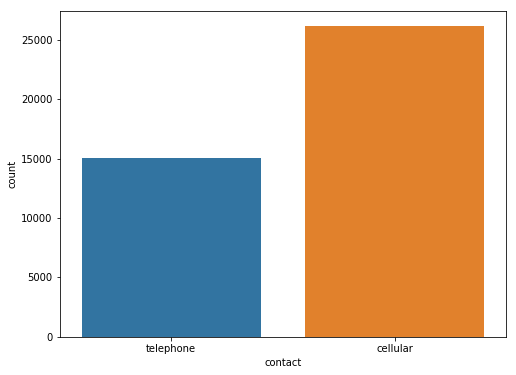

In [105]:
plt.figure(figsize = (8,6))
sns.countplot(d.contact)

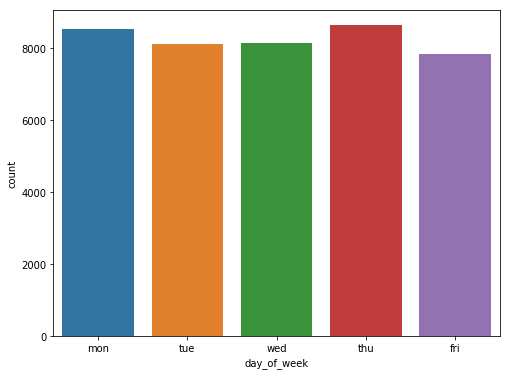

In [106]:
plt.figure(figsize = (8,6))
sns.countplot(d.day_of_week)

In [114]:
d.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons_conf_idx,euribor_3_month,deposit
0,56,housemaid,married,primary,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,-36.4,4.857,no
1,57,services,married,secondary,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,-36.4,4.857,no
2,37,services,married,secondary,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,-36.4,4.857,no


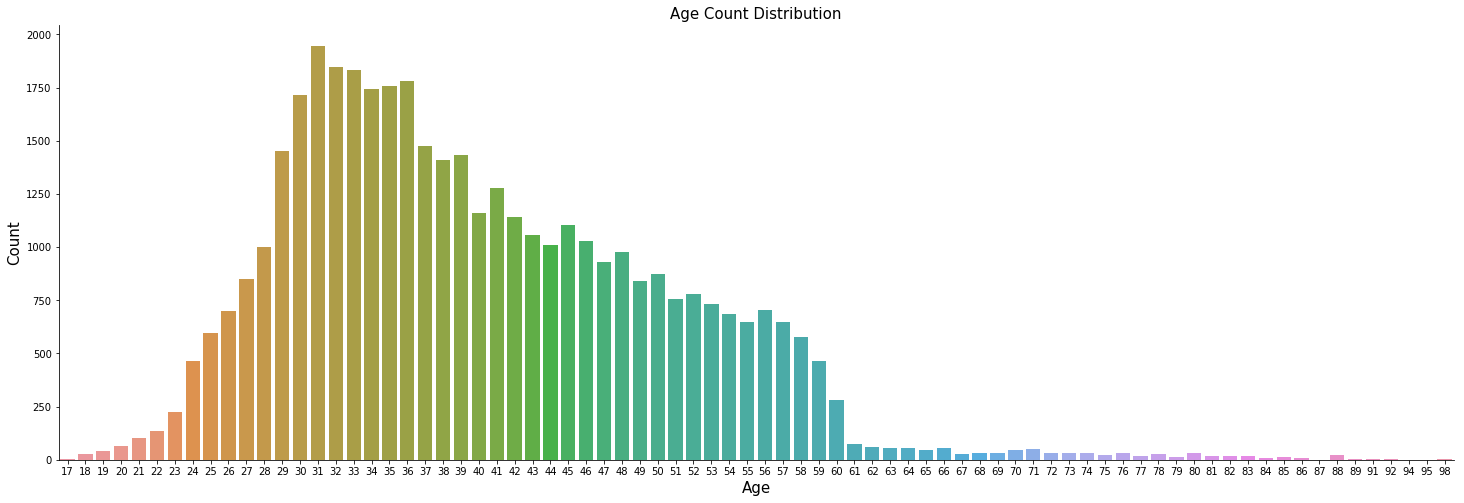

In [108]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'age', data = d)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

In [109]:
g = d.groupby(['job', 'education'])[['age', 'deposit']]
#sns.despine()

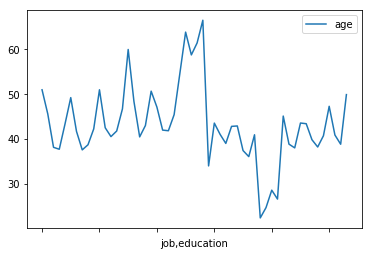

In [110]:
g.mean().plot()

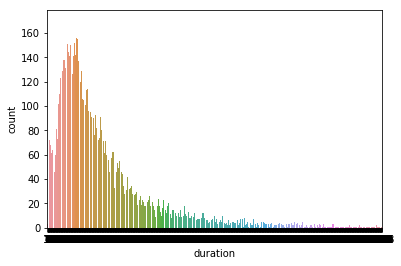

In [111]:
sns.countplot(d.duration)

In [112]:
d[d.duration == 0]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons_conf_idx,euribor_3_month,deposit
6251,39,admin.,married,secondary,no,yes,no,telephone,may,tue,0,4,999,0,nonexistent,-36.4,4.857,no
23031,59,management,married,tertiary,no,yes,no,cellular,aug,tue,0,10,999,0,nonexistent,-36.1,4.965,no
28063,53,blue-collar,divorced,secondary,no,yes,no,cellular,apr,fri,0,3,999,0,nonexistent,-47.1,1.479,no
33015,31,blue-collar,married,secondary,no,no,no,cellular,may,mon,0,2,999,0,nonexistent,-46.2,1.299,no


Text(0.5, 1.0, 'Age Vs Deposits')

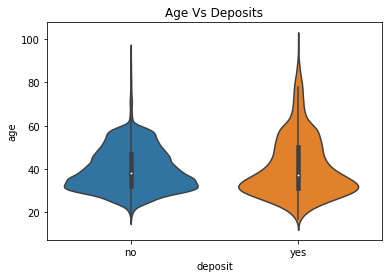

In [119]:
#Age distributions of yesses and nos:
ax, fig = figsize =(12,6)
sns.violinplot(x=d.deposit, y=d.age)
plt.title("Age Vs Deposits")


In [115]:
####Deposits are widely spread can see that the number 'yes' goes beyong the age of 60 (retired)

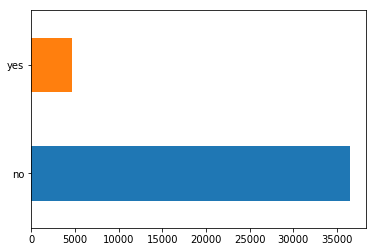

In [120]:
d.deposit.value_counts().plot(kind = 'barh')

In [121]:
d.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [122]:
d.age.max()

98

In [123]:
d.age.min()

17

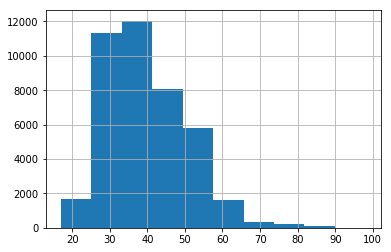

In [124]:
d.age.hist()

#### Though the age distribution is slightly skewed to the right and has outliers, since those are real valuable data points cannot drop them

In [125]:
d.age.mean()

40.02406040594348

In [126]:
np.median(d.age)

38.0

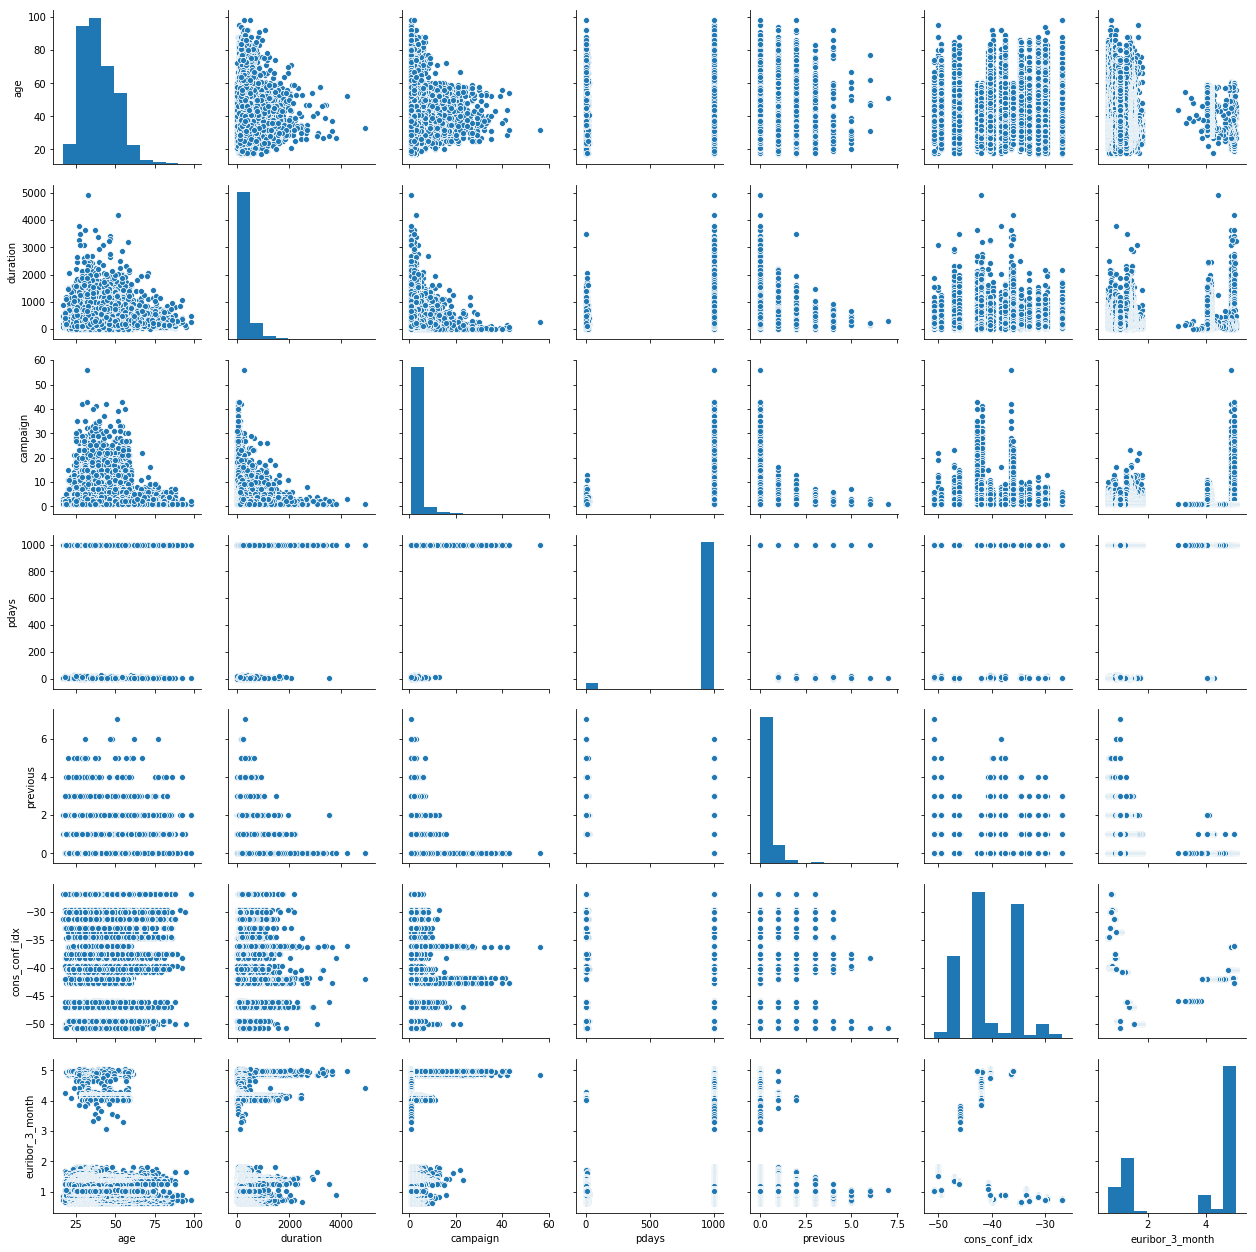

In [127]:
sns.pairplot(d)

In [128]:
d.corr()

,age,duration,campaign,pdays,previous,cons_conf_idx,euribor_3_month
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,0.129372,0.010767
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.008173,-0.032897
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,-0.013733,0.135133
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,-0.091342,0.296899
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.050936,-0.454494
cons_conf_idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,1.000000,0.277686
euribor_3_month,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.277686,1.000000


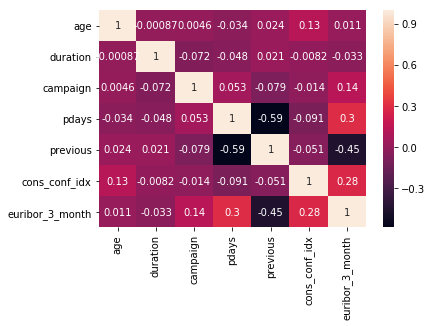

In [128]:
sns.heatmap(d.corr(), annot = True)

In [131]:
d.deposit.value_counts()

no     36548
yes     4640
Name: deposit, dtype: int64

#### Exploratory Data Analysis with respect to deposits

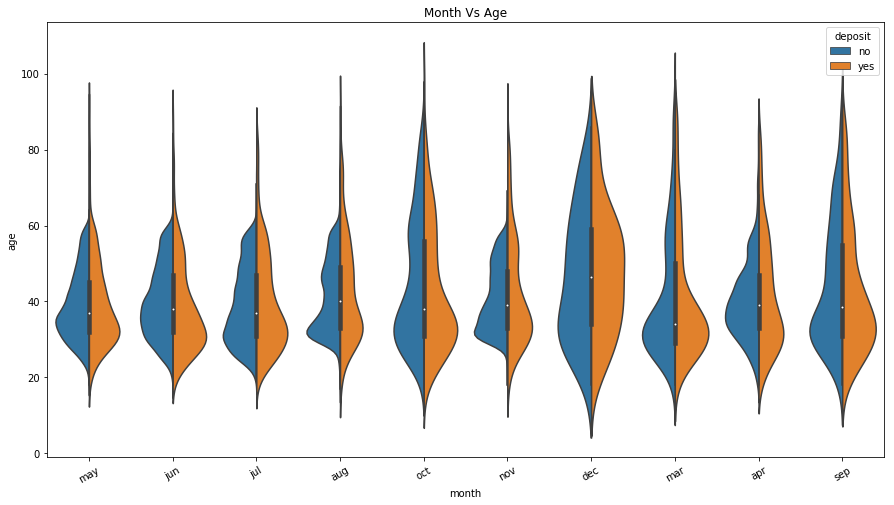

In [130]:
plt.figure(figsize = (15,8))
plt.title("Month Vs Age")
g = sns.violinplot(x=d.month, y=d.age, hue=d.deposit, split=True)
tick_labels = g.set_xticklabels(g.get_xticklabels(),rotation=30)

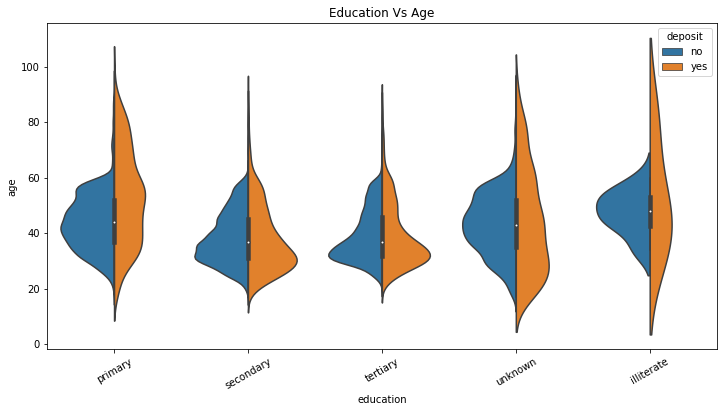

In [131]:
plt.figure(figsize = (12,6))
plt.title("Education Vs Age")
g = sns.violinplot(x=d.education, y=d.age, hue=d.deposit, split=True)
tick_labels = g.set_xticklabels(g.get_xticklabels(),rotation=30)

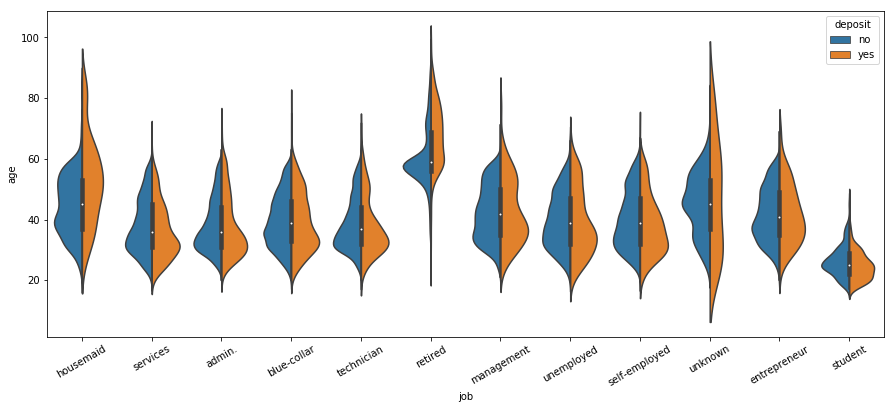

In [132]:
plt.figure(figsize = (15,6))
g = sns.violinplot(x=d.job, y=d.age, hue=d.deposit, split=True)
tick_labels = g.set_xticklabels(g.get_xticklabels(),rotation=30)

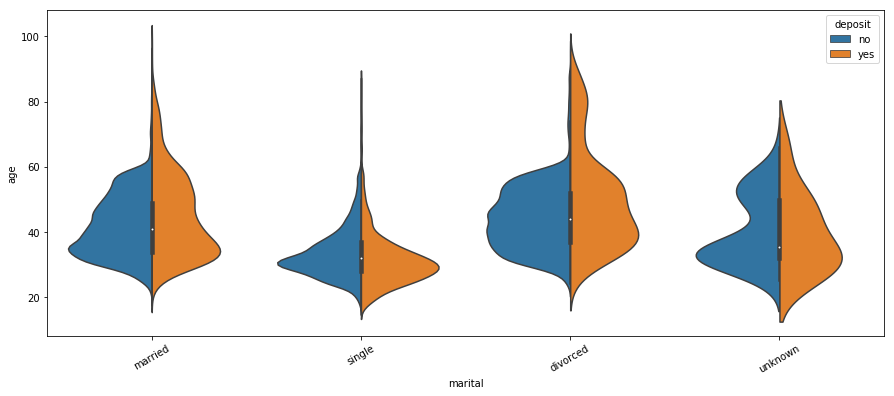

In [133]:
plt.figure(figsize = (15,6))
g = sns.violinplot(x=d.marital, y=d.age, hue=d.deposit, split=True)
tick_labels = g.set_xticklabels(g.get_xticklabels(),rotation=30)

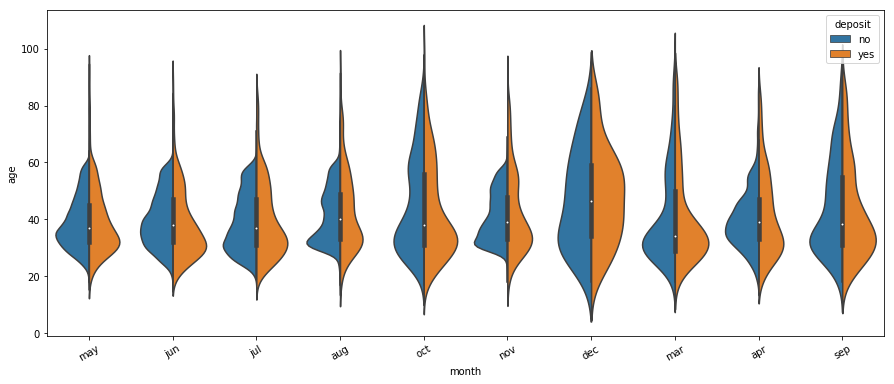

In [134]:
plt.figure(figsize = (15,6))
g = sns.violinplot(x=d.month, y=d.age, hue=d.deposit, split = True)
tick_labels = g.set_xticklabels(g.get_xticklabels(),rotation=30)

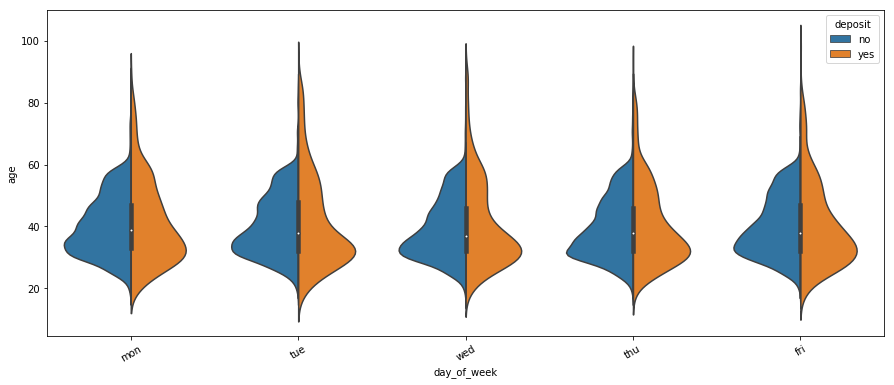

In [135]:
plt.figure(figsize = (15,6))
g = sns.violinplot(x=d.day_of_week, y=d.age, hue=d.deposit, split=True)
tick_labels = g.set_xticklabels(g.get_xticklabels(),rotation=30)

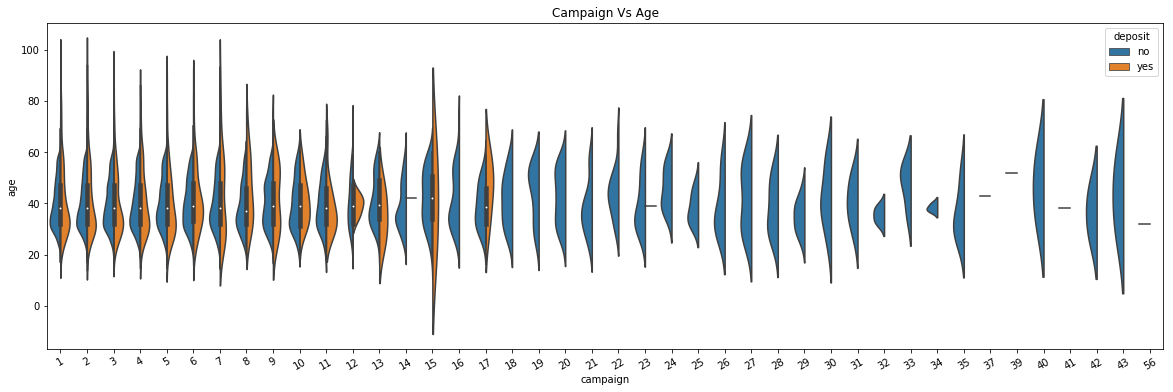

In [136]:
plt.figure(figsize = (20,6))
plt.title("Campaign Vs Age")
g = sns.violinplot(x=d.campaign, y=d.age, hue=d.deposit, split=True)
tick_labels = g.set_xticklabels(g.get_xticklabels(),rotation=30)

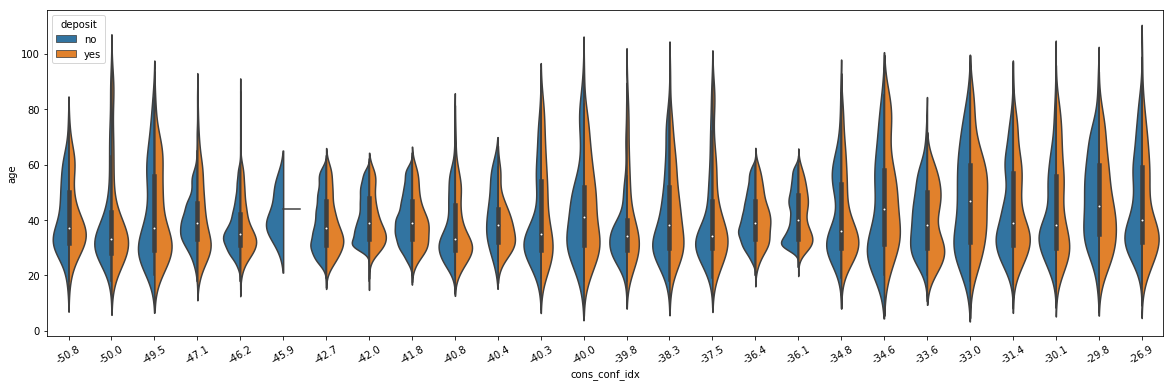

In [137]:
plt.figure(figsize = (20,6))
g = sns.violinplot(x=d.cons_conf_idx, y=d.age, hue=d.deposit, split=True)
tick_labels = g.set_xticklabels(g.get_xticklabels(),rotation=30)

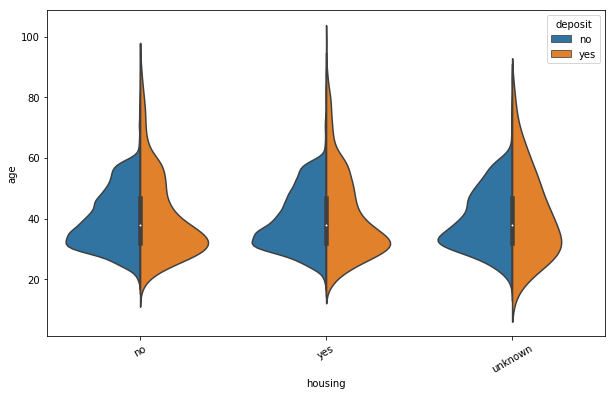

In [138]:
plt.figure(figsize = (10,6))
g = sns.violinplot(x=d.housing, y=d.age, hue=d.deposit, split=True)
tick_labels = g.set_xticklabels(g.get_xticklabels(),rotation=30)

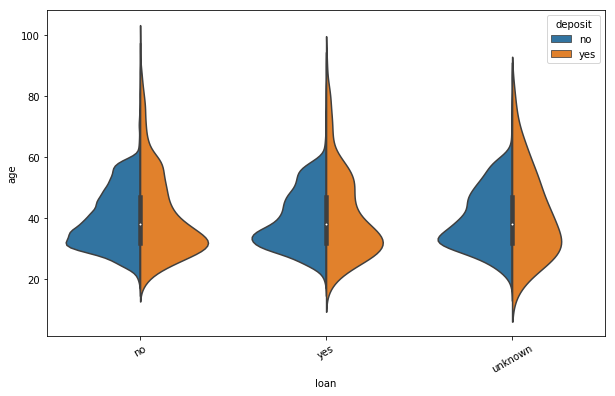

In [139]:
plt.figure(figsize = (10,6))
g = sns.violinplot(x=d.loan, y=d.age, hue=d.deposit, split=True)
tick_labels = g.set_xticklabels(g.get_xticklabels(),rotation=30)

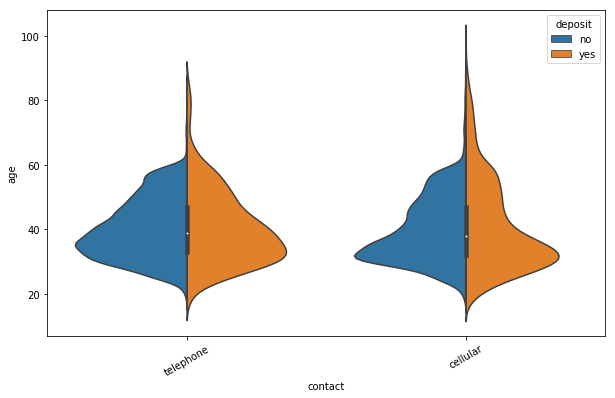

In [140]:
plt.figure(figsize = (10,6))
g = sns.violinplot(x=d.contact, y=d.age, hue=d.deposit, split=True)
tick_labels = g.set_xticklabels(g.get_xticklabels(),rotation=30)

In [146]:
d.age.max()

98

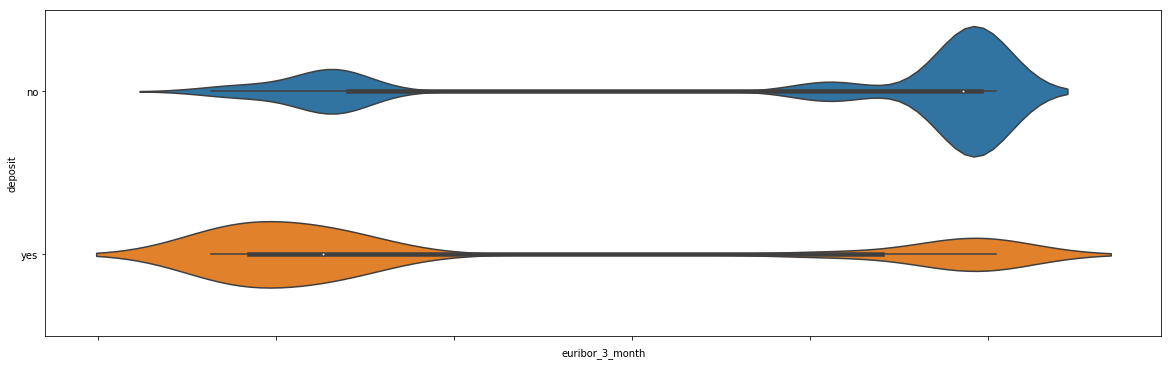

In [141]:
plt.figure(figsize = (20,6))
g = sns.violinplot(x=d.euribor_3_month, y =d.deposit, split=True)
tick_labels = g.set_xticklabels(g.get_xticklabels(),rotation=30)

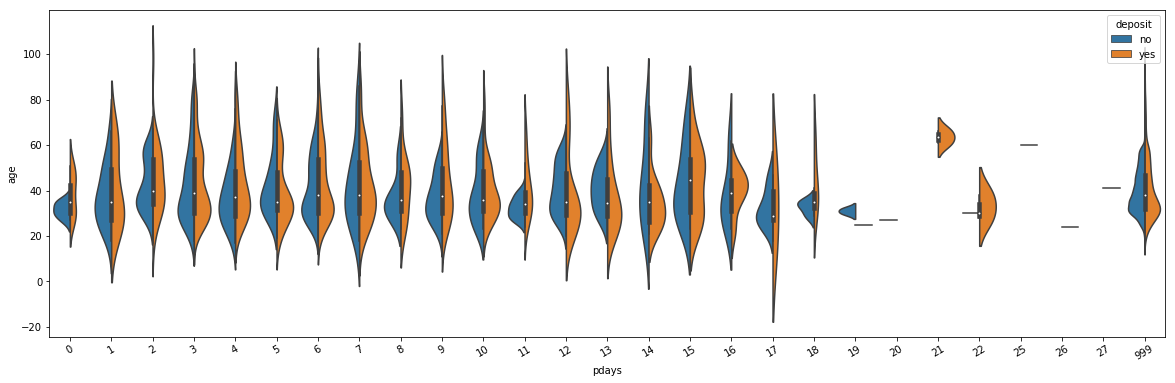

In [142]:
plt.figure(figsize = (20,6))
g = sns.violinplot(x=d.pdays, y=d.age, hue=d.deposit, split=True)
tick_labels = g.set_xticklabels(g.get_xticklabels(),rotation=30)

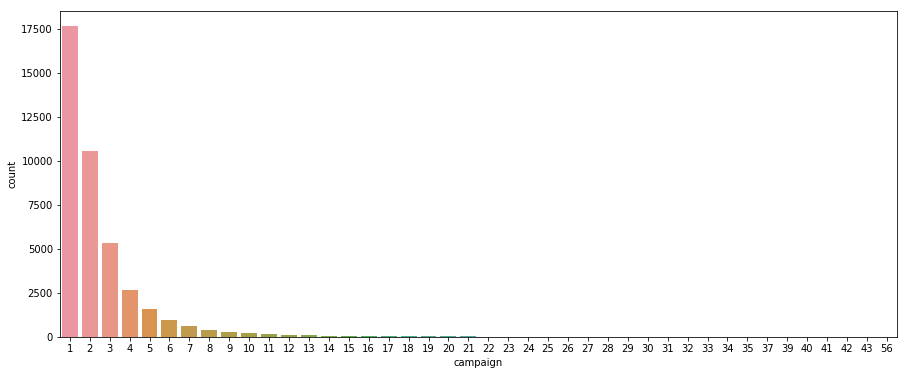

In [152]:
plt.figure(figsize = (15,6))
sns.countplot(d.campaign)

#### Changing all categorical values in to numerics

In [116]:
d.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [117]:
#changing job into numerics using label encoding
lbl = LabelEncoder()
d.job = lbl.fit_transform(d.job)

In [118]:
d.job.unique()

array([ 3,  7,  0,  1,  9,  5,  4, 10,  6, 11,  2,  8], dtype=int64)

In [119]:
d.education.unique()

array(['primary', 'secondary', 'tertiary', 'unknown', 'illiterate'],
      dtype=object)

In [120]:
d.education = d.education.map({'primary':2, 'secondary': 3, 'tertiary': 4, 'unknown': 1, 'illiterate': 0})

In [121]:
d.education.unique()

array([2, 3, 4, 1, 0], dtype=int64)

In [122]:
d.default.unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [161]:
d.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [162]:
d.loan.unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [163]:
d.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

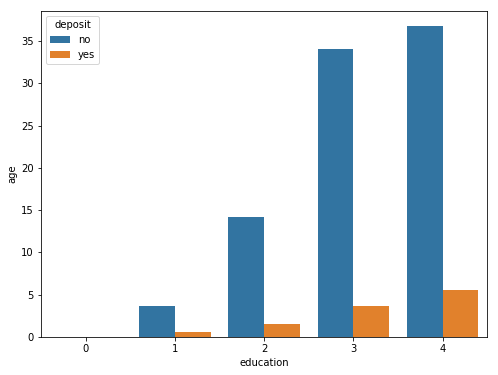

In [164]:
plt.figure(figsize=(8,6))


sns.barplot(x="education", y="age", hue="deposit", data=d, estimator=lambda x: len(x) / len(d) * 100)


In [123]:
#### Customers woth tertiary education had majorly said 'yes' for term deposits

In [165]:
d.contact.unique()

array(['telephone', 'cellular'], dtype=object)

In [125]:
d.contact = d.contact.map({'telephone': 1, 'cellular': 2})

In [127]:
d.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [128]:
d.month = d.month.map({'jan': 1, 'feb': 2, 'mar':3, 'apr': 4, 'may':5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12 })

In [129]:
d.month.unique()

array([ 5,  6,  7,  8, 10, 11, 12,  3,  4,  9], dtype=int64)

In [130]:
d.day_of_week.unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [131]:
d.day_of_week = d.day_of_week.map({'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5})

In [132]:
d.day_of_week.unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [174]:
d.day_of_week.value_counts()

4    8623
1    8514
3    8134
2    8090
5    7827
Name: day_of_week, dtype: int64

In [175]:
#d.housing = pd.get_dummies(d.housing, prefix_sep="dummy")

In [176]:
d.housing.unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [177]:
d.default.unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [133]:
d.default = d.default.map({'no': 0, 'unknown':1, 'yes': 2})

In [134]:
d.default.unique()

array([0, 1, 2], dtype=int64)

In [135]:
d.default.value_counts()

0    32588
1     8597
2        3
Name: default, dtype: int64

In [181]:
d.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [182]:
d.housing.isnull().sum()

0

In [183]:
d.loan.unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [136]:
d.loan = d.loan.map({'no': 0, 'unknown':1, 'yes': 2})

In [137]:
d.loan.unique()

array([0, 2, 1], dtype=int64)

In [186]:
d.loan.value_counts()

0    33950
2     6248
1      990
Name: loan, dtype: int64

In [138]:
d.housing = d.housing.map({'no': 0, 'unknown':1, 'yes': 2})

In [139]:
d.housing.unique()

array([0, 2, 1], dtype=int64)

In [189]:
d.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
cons_conf_idx      0
euribor_3_month    0
deposit            0
dtype: int64

In [140]:
d.poutcome.unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [141]:
d.poutcome = d.poutcome.map({'nonexistent': 0, 'failure': 1, 'success': 2})

In [142]:
d.poutcome.unique()

array([0, 1, 2], dtype=int64)

In [143]:
d.poutcome.value_counts()

0    35563
1     4252
2     1373
Name: poutcome, dtype: int64

In [144]:
d.previous.unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [145]:
d.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons_conf_idx,euribor_3_month,deposit
0,56,3,married,2,0,0,0,NaN,5,1,261,1,999,0,0,-36.4,4.857,no
1,57,7,married,3,1,0,0,NaN,5,1,149,1,999,0,0,-36.4,4.857,no
2,37,7,married,3,0,2,0,NaN,5,1,226,1,999,0,0,-36.4,4.857,no
3,40,0,married,2,0,0,0,NaN,5,1,151,1,999,0,0,-36.4,4.857,no
4,56,7,married,3,0,0,2,NaN,5,1,307,1,999,0,0,-36.4,4.857,no


In [198]:
#dropping poutcome
#d.drop(columns =['poutcome'], axis = 1, inplace = True)

In [200]:
d.pdays.unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

In [201]:
d.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,cons_conf_idx,euribor_3_month,deposit,poutcome__failure,poutcome__nonexistent,poutcome__success
0,56,3,3,2,0,0,0,1,5,1,261,1,999,0,-36.4,4.857,no,0,1,0
1,57,7,3,3,1,0,0,1,5,1,149,1,999,0,-36.4,4.857,no,0,1,0
2,37,7,3,3,0,2,0,1,5,1,226,1,999,0,-36.4,4.857,no,0,1,0
3,40,0,3,2,0,0,0,1,5,1,151,1,999,0,-36.4,4.857,no,0,1,0
4,56,7,3,3,0,0,2,1,5,1,307,1,999,0,-36.4,4.857,no,0,1,0


In [146]:
#converting seconds in 'duration' column to minutes:
d.duration = d.duration.map(lambda x: x/60)

In [165]:
d.duration.describe()

count    41188.000000
mean         4.304750
std          4.321321
min          0.000000
25%          1.700000
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

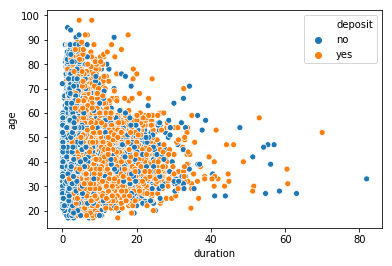

In [147]:
sns.scatterplot(x = d.duration, y = d.age, hue = d.deposit)

In [148]:
####Duration has lot of impact on calls as higher the duration they likely to subscribe

In [206]:
d.dtypes

age                        int64
job                        int32
marital                    int64
education                  int64
default                    int64
housing                    int64
loan                       int64
contact                    int64
month                      int64
day_of_week                int64
duration                 float64
campaign                   int64
pdays                      int64
previous                   int64
cons_conf_idx            float64
euribor_3_month          float64
deposit                   object
poutcome__failure          uint8
poutcome__nonexistent      uint8
poutcome__success          uint8
dtype: object

In [207]:
d.pdays.unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

In [149]:
print(d.housing.value_counts())
print(d.loan.value_counts())
print(d.default.value_counts())

2    21576
0    18622
1      990
Name: housing, dtype: int64
0    33950
2     6248
1      990
Name: loan, dtype: int64
0    32588
1     8597
2        3
Name: default, dtype: int64


C:\Users\r_ani\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


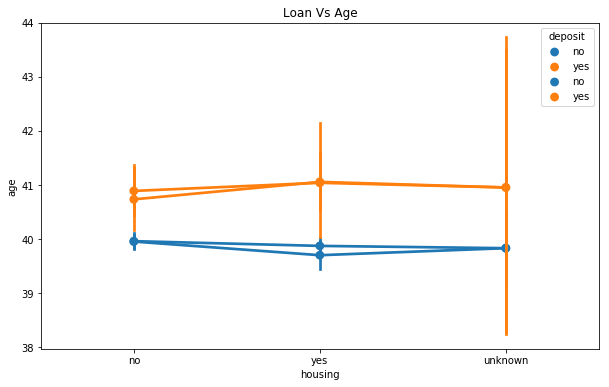

In [168]:
plt.figure(figsize = (10,6))
plt.title("Loan Vs Age")
sns.pointplot(d.loan, d.age,hue = d.deposit)
sns.pointplot(d.housing, d.age, hue = d.deposit)

In [150]:
# if duration is 0 means call is not made, so deleting those rows
dur_0 = d[d.duration ==  0]

In [152]:
d.drop(index = dur_0.index, axis = 0, inplace = True)

In [153]:
d[d.duration ==  0]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons_conf_idx,euribor_3_month,deposit


In [154]:
d.shape

(41184, 18)

In [155]:
d.deposit = d.deposit.map({'yes': 1, 'no': 0})

In [162]:
d.deposit.unique()

array([0, 1], dtype=int64)

In [ ]:
## Since age above 60 in EDA shows much ineterest on subscription, lets to a hypothesis testing on the same.

In [168]:
#Slicing the datset with age group 60 & above (retired age group)
data_retired_age_deposit = d[(d.age >= 60) & (d.deposit == 1 )]

In [169]:
#Slicing the dataset with age group below 60
data_other_age_groups = d[(d.age < 60) & (d.deposit == 1)]

In [171]:
data_other_age_groups.shape

(4168, 18)

In [172]:
data_retired_age_deposit.shape

(472, 18)

In [ ]:
retired = d[d.job = ]

In [189]:
#### importing the stats using scipy library

In [173]:
import scipy.stats as stats

In [187]:
# our hypothesis is to say that the age above 60years or retired age people subscribe for term deposits than other age groups with jobs or no jobs.
#Null hypothesis : H0 : Term Subscription is not significant in the age group 60 and above i.e retired age
# Alternate hypothesis: H1 : Term deposit in the age group 60 and above is significant than other age groups.
# Setting the alpha value to 0.05
alpha = 0.05
t = stats.ttest_ind(data_retired_age_deposit.job, data_other_age_groups.job)
if t[1] < 0.05:
    print("We reject our null hypothesis @ this p value " + str(t[1]) + " and conclude that the subscription to term deposit is significant in the age group 60 and above than other age groups")
else:
    print("We fail to reject our null hypothesis @ p value " + str(t[0]) + " and cannot conclude that the term deposit is significant in the age group 60 and above")

We reject our null hypothesis @ this p value 0.0006271282637410888 and conclude that the subscription to term deposit is significant in the age group 60 and above than other age groups


In [188]:
t

Ttest_indResult(statistic=3.421943169511481, pvalue=0.0006271282637410888)

#### Since the p value is less than .05, it is clear that age group 60 and above do opt for subsriptions and our alternate hypothesis is true

In [190]:
##Finished with EDA, now will try models...in the next notebook!